In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
## Initialising the CNN
classifier = Sequential()

In [17]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [18]:
## Flattening
classifier.add(Flatten())

In [19]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))

In [20]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [21]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

### data importing and transforming and scaling

In [23]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2, # It will add shear image of the original image - eg -100 images
                                   zoom_range = 0.2,  # It will add zooming image of the original image - 100 images
                                   horizontal_flip = True) # It will add the flip images from the original image - 100 images
                                                        # so the total Imgages are 400

# Image Generator do all the preprocessing task of the image or it will take care the image scaling and feed the data 
# and rescaling it.


In [24]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
## Importing training data
train_set = train_datagen.flow_from_directory('C:/Users/Aakash Sharma/Desktop/AI/helmet_detection/helmet_detection/training',
                                               target_size=(64,64),    
                                              # here 64, 64 will be same as the above convolutional input shape
                                               class_mode='binary')

Found 647 images belonging to 2 classes.


In [26]:
train_set.class_indices             # Its put in alphabatical order

{'with helmet': 0, 'without helmet': 1}

In [27]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [28]:
## Importng test data
test_set = test_datagen.flow_from_directory('C:/Users/Aakash Sharma/Desktop/AI/helmet_detection/helmet_detection/testing',
                                            target_size=(64,64),                                           
                                            class_mode='binary')

Found 208 images belonging to 2 classes.


In [29]:
## fitting model to images
classifier.fit_generator(        # fit_generator perform the both test and training accuracy
        train_set,
        epochs=5,
        validation_data=test_set
        )

Epoch 1/5
21/21 [==============================] - 15s 728ms/step - loss: 0.6822 - accuracy: 0.5363 - val_loss: 0.6448 - val_accuracy: 0.4904
Epoch 2/5
21/21 [==============================] - 9s 429ms/step - loss: 0.6073 - accuracy: 0.6847 - val_loss: 0.5094 - val_accuracy: 0.6635
Epoch 3/5
21/21 [==============================] - 9s 451ms/step - loss: 0.4961 - accuracy: 0.7635 - val_loss: 0.4825 - val_accuracy: 0.5769
Epoch 4/5
21/21 [==============================] - 9s 416ms/step - loss: 0.4193 - accuracy: 0.8223 - val_loss: 0.7014 - val_accuracy: 0.7788
Epoch 5/5
21/21 [==============================] - 9s 425ms/step - loss: 0.3955 - accuracy: 0.8269 - val_loss: 0.6658 - val_accuracy: 0.6442


## fitting model to images

In [44]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:/Users/Aakash Sharma/Desktop/AI/helmet_detection/helmet_detection/single_prediction/abd.jpg'
                           ,target_size =(64,64))


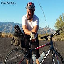

In [45]:
test_image

In [46]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [47]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [48]:
result = classifier.predict(test_image)

In [49]:
result = result.round()

In [50]:
result

array([[0.]], dtype=float32)

In [51]:
## Class label of dog and cat

if result == 1:
    prediction = 'without helmet'
else:
    prediction = 'with helmet'
    

In [52]:
prediction

'with helmet'